In [17]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [18]:
# Create the grid for the houses

def new_grid(n,m):
    '''
    Set up a new, empty grid
    '''
    return np.ones([n,m])

In [19]:
def even_houses(n,m,v):
    '''
    Set up a grid where all houses have the same inital value v. Every grid box is a house
    '''
    houses = v*new_grid(n,m)
    return houses

In [20]:
def plot_grid(grid):
    ''' 
    Plot a grid with yellow as high value and blue as low value
    '''
    img = plt.imshow(grid,cmap='inferno')
    return img

In [21]:
# Initialize affluence of householders as their own grid corresponding to which house they are in
def householders(n, m, a, p):
    '''
    Initialize affluence of householders as their own grid corresponding to which house they are in
    Inputs:
    a (array) the affluence amounts
    p (array) respective proportion of affluence amounts 
    '''
    affluence = new_grid(n,m)
    affluence = np.random.choice(a,size = (n,m), p=p)

    return affluence

In [22]:
# Check to see if we should move the householders and then move if needed
def delta(houses, affluence, x, y):
    '''
    Check to see if we should move the householders and then move if needed
    Inputs:
    x (array) index of one of the householders
    y (array) index of the other householders
    '''

    delta = (affluence[x] - houses[x])**2 + (affluence[y] - houses[y])**2 - (affluence[x] - houses[y])**2 - (affluence[y] - houses[x])**2

    # Swtich householders if necessary
    if delta > 0:
        x_old = x

        x = y
        y = x_old

In [23]:
# Calculate average prices depending on where you are in the grid

def calculate_average(i,j,n,m, grid):
    row_min = max(0, i - 2)
    row_max = min(m-1, i + 2)
    
    col_min = max(0, j - 2)
    col_max = min(n-1, j + 2)
    
    neighborhood = grid[row_min:row_max+1, col_min:col_max+1]
    
    return neighborhood.mean()

In [24]:
# Update all the values
def update_house_prices(houses, affluence, weight):
    '''
    Calculate Vt function and update the houses values
    '''
    updated_grid = houses.copy()

    
    n = houses.shape[0]
    m = houses.shape[1]

    for i in range(n):
        for j in range(m):
            updated_grid[i,j] = affluence[i,j] + weight*calculate_average(i,j, n,m, houses)

    houses = updated_grid

    return houses

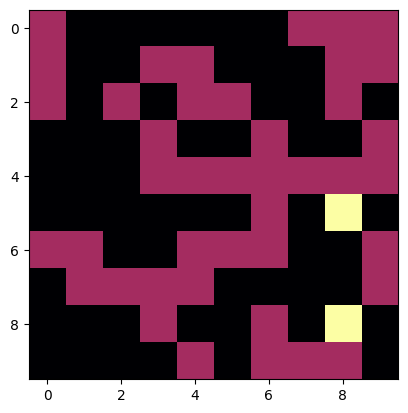

In [25]:
a = [1,0.5,0.1]
p = [0.1, 0.4, 0.5]

people = householders(10,10, a,p)

plot_grid(people)

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

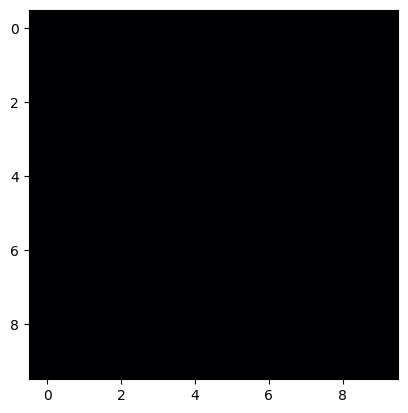

In [31]:
n_steps = 10

board = even_houses(10,10,5)
fig, ax = plt.subplots()
img = plot_grid(board)

plot_grid(board)
display(board)

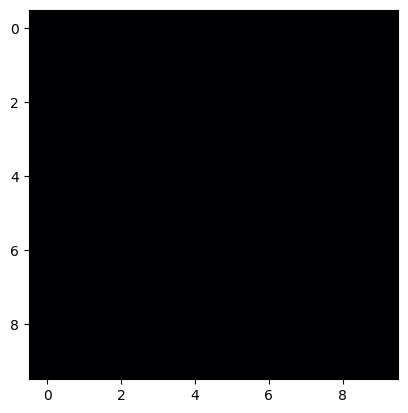

In [33]:
# Test with a glider example with the standard code


for i_step in range(n_steps):
    board = update_house_prices(board, people, 0.5)
    display(board)
    img.set_array(board)
    plt.pause(1)
    clear_output(wait=True)
    display(fig)